# Data Understanding
Understanding data formats, relations and routines

timestamp
1970-01-10 06:41:54.325436853   -48352.094
1970-01-10 06:41:54.329436848   -48354.777
1970-01-10 06:41:54.333436843   -48352.664
1970-01-10 06:41:54.337436839   -48348.270
1970-01-10 06:41:54.341436834   -48348.836
                                   ...    
1970-01-10 06:42:24.313402034   -49833.008
1970-01-10 06:42:24.317402029   -49825.605
1970-01-10 06:42:24.321402025   -49825.810
1970-01-10 06:42:24.325402020   -49831.258
1970-01-10 06:42:24.329402015   -49832.195
Name: Fp1, Length: 7502, dtype: float64
timestamp
1970-01-10 06:41:54.325436853   -56004.926
1970-01-10 06:41:54.329436848   -56007.977
1970-01-10 06:41:54.333436843   -56003.500
1970-01-10 06:41:54.337436839   -56001.223
1970-01-10 06:41:54.341436834   -56005.332
                                   ...    
1970-01-10 06:42:24.313402034   -57424.480
1970-01-10 06:42:24.317402029   -57418.336
1970-01-10 06:42:24.321402025   -57421.023
1970-01-10 06:42:24.325402020   -57427.574
1970-01-10 06:42:24.329402015   -5742

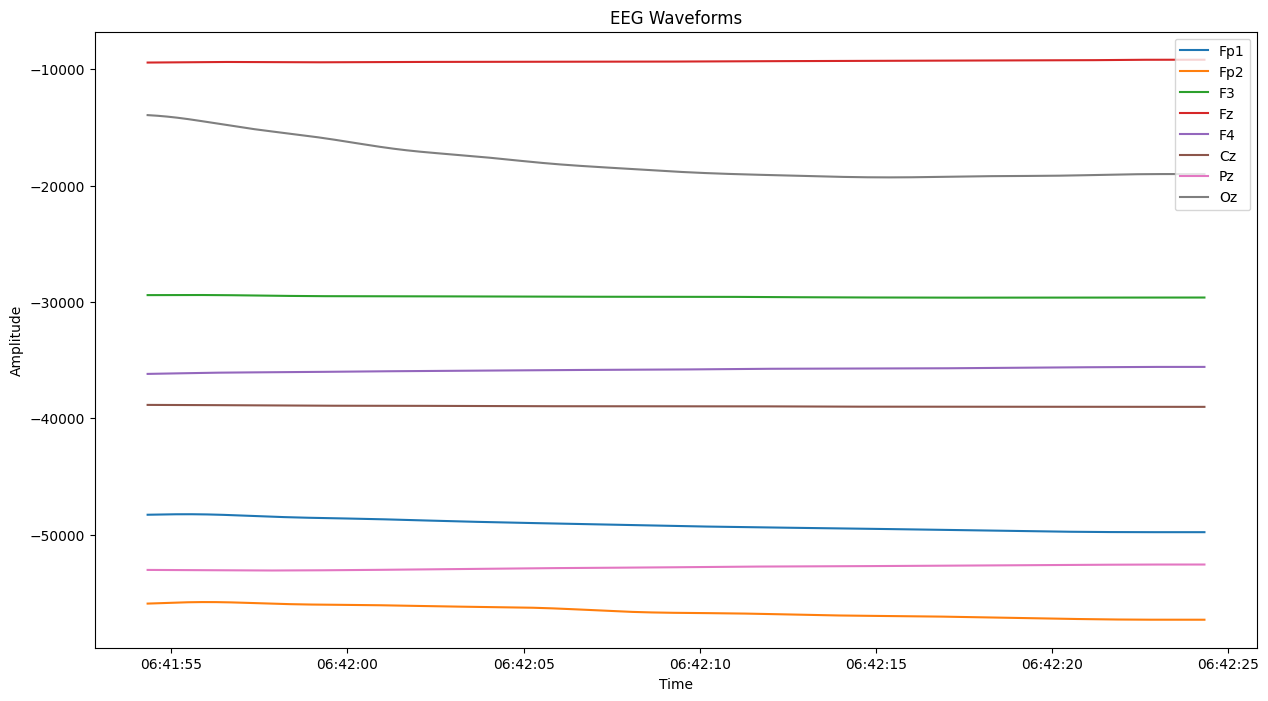

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load the data
data = pd.read_csv('Subject_1_baseline_eyesclosed_eeg.csv')

# Check for missing values
data = data.dropna()

# Regularize the time intervals (resample if needed)
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')  # Convert to datetime if necessary
data.set_index('timestamp', inplace=True)
#data = data.resample('10ms').interpolate()  # Resample to 10ms intervals

# Detect outliers (Z-score method)
z_scores = np.abs((data - data.mean()) / data.std())
data = data[(z_scores < 3).all(axis=1)]  # Remove rows with outliers

# Denoise using a low-pass filt
def butter_lowpass_filter(data, cutoff, fs, order=5):  # Reduce order to 2
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)


for col in data.columns:
    print (data[col])
    data[col] = butter_lowpass_filter(data[col], cutoff=1, fs=1000)  # Adjust parameters

# Plot the EEG channels
plt.figure(figsize=(15, 8))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.title('EEG Waveforms')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 70.4 MB/s eta 0:00:00


Creating RawArray with float64 data, n_channels=8, n_times=7502
    Range : 0 ... 7501 =      0.000 ...     7.501 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 33001 samples (33.001 s)



<ipython-input-8-a3feff522c2e>:24: RuntimeWarning: Omitted 7502 annotation(s) that were outside data range.
  raw.set_annotations(annotations)
<ipython-input-8-a3feff522c2e>:28: RuntimeWarning: filter_length (33001) is longer than the signal (7502), distortion is likely. Reduce filter length or filter a longer signal.
  raw.filter(l_freq=0.1, h_freq=50)


Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 0.2s.


No digitization points found. Skipping component plot.
Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 8 PCA components


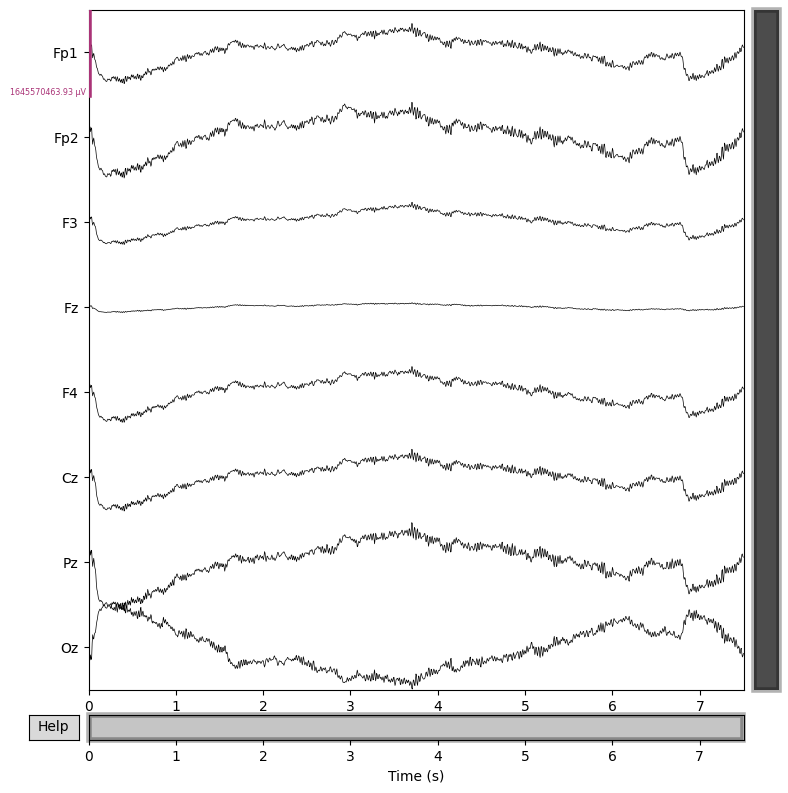

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
No digitization points found. Skipping sensor topomap plot.
Overwriting existing file.
Writing /content/Subject_1_baseline_eyesclosed_eeg.fif
Closing /content/Subject_1_baseline_eyesclosed_eeg.fif
[done]
EEG analysis complete. Processed data saved as 'processed_eeg.fif'.
Creating RawArray with float64 data, n_channels=8, n_times=7500
    Range : 0 ... 7499 =      0.000 ...     7.499 secs
Ready.


<ipython-input-8-a3feff522c2e>:45: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 33001 samples (33.001 s)



<ipython-input-8-a3feff522c2e>:24: RuntimeWarning: Omitted 7500 annotation(s) that were outside data range.
  raw.set_annotations(annotations)
<ipython-input-8-a3feff522c2e>:28: RuntimeWarning: filter_length (33001) is longer than the signal (7500), distortion is likely. Reduce filter length or filter a longer signal.
  raw.filter(l_freq=0.1, h_freq=50)


Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 1.0s.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


No digitization points found. Skipping component plot.
Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 8 PCA components


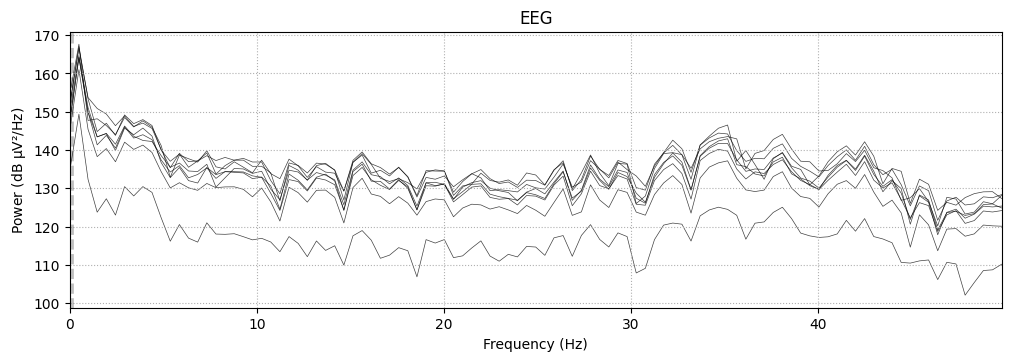

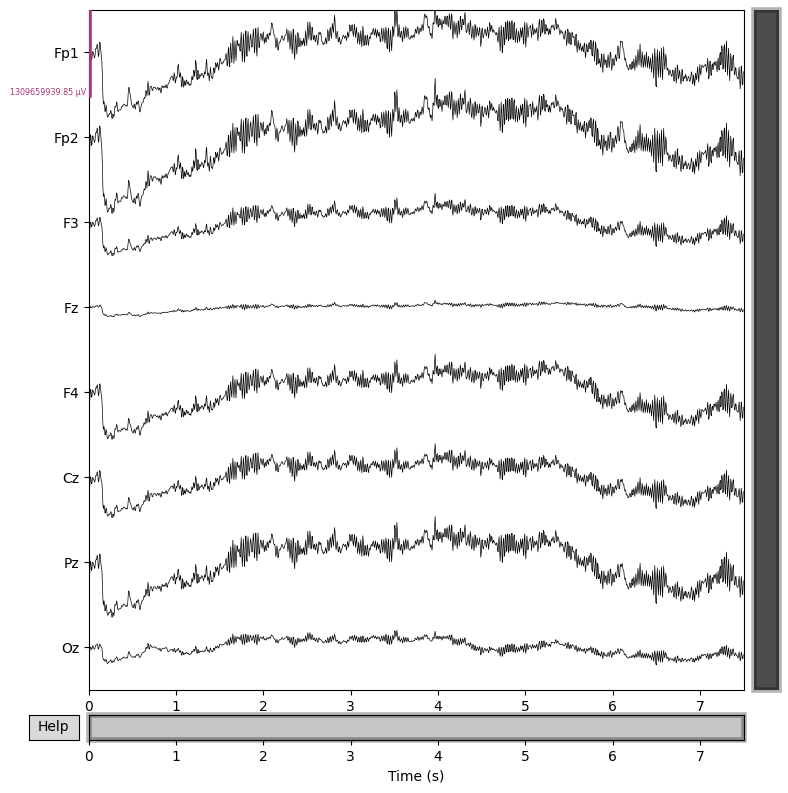

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
No digitization points found. Skipping sensor topomap plot.
Overwriting existing file.
Writing /content/Subject_1_baseline_eyesopen_eeg.fif
Closing /content/Subject_1_baseline_eyesopen_eeg.fif
[done]
EEG analysis complete. Processed data saved as 'processed_eeg.fif'.
Creating RawArray with float64 data, n_channels=8, n_times=27727
    Range : 0 ... 27726 =      0.000 ...    27.726 secs
Ready.


<ipython-input-8-a3feff522c2e>:45: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 33001 samples (33.001 s)



<ipython-input-8-a3feff522c2e>:24: RuntimeWarning: Omitted 27727 annotation(s) that were outside data range.
  raw.set_annotations(annotations)
<ipython-input-8-a3feff522c2e>:28: RuntimeWarning: filter_length (33001) is longer than the signal (27727), distortion is likely. Reduce filter length or filter a longer signal.
  raw.filter(l_freq=0.1, h_freq=50)


Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 0.5s.


No digitization points found. Skipping component plot.
Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 8 PCA components


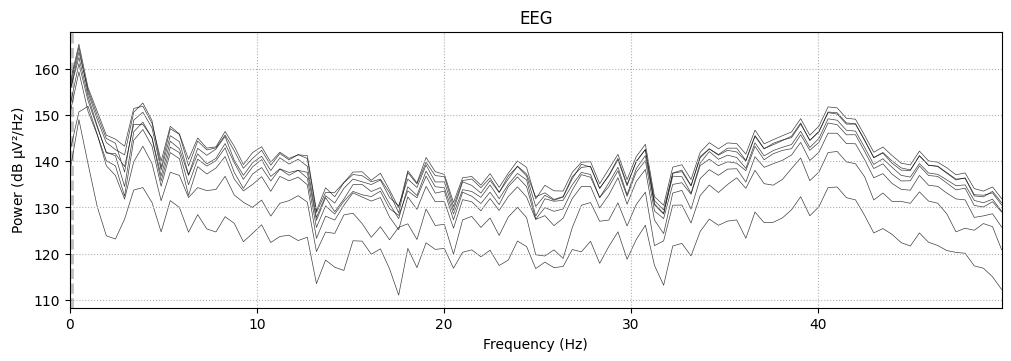

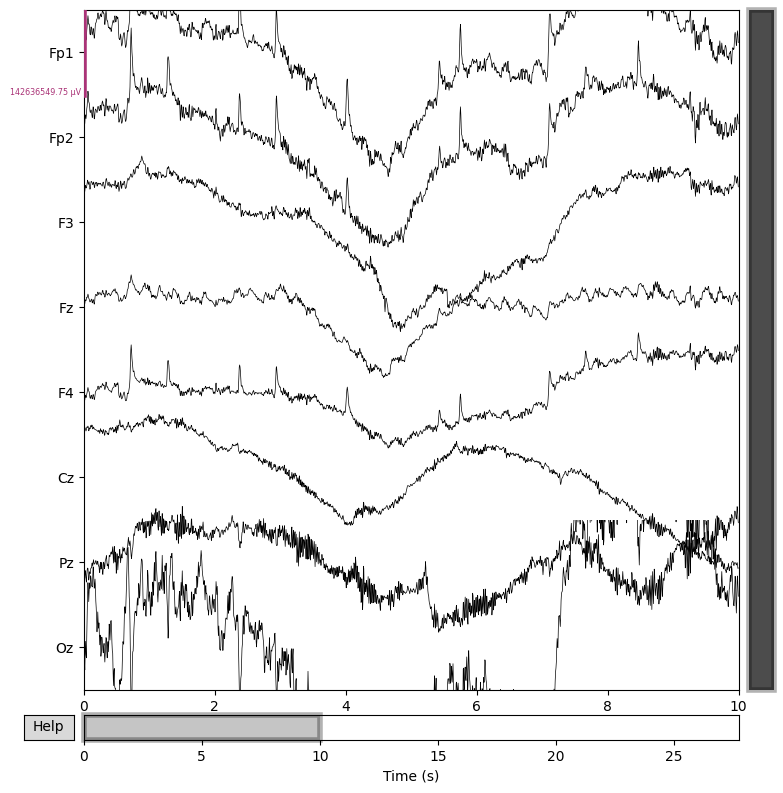

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
No digitization points found. Skipping sensor topomap plot.
Overwriting existing file.
Writing /content/Subject_1_dual-task_paradigm_eeg.fif
Closing /content/Subject_1_dual-task_paradigm_eeg.fif
[done]
EEG analysis complete. Processed data saved as 'processed_eeg.fif'.
Creating RawArray with float64 data, n_channels=8, n_times=27730
    Range : 0 ... 27729 =      0.000 ...    27.729 secs
Ready.


<ipython-input-8-a3feff522c2e>:45: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 33001 samples (33.001 s)



<ipython-input-8-a3feff522c2e>:24: RuntimeWarning: Omitted 27730 annotation(s) that were outside data range.
  raw.set_annotations(annotations)
<ipython-input-8-a3feff522c2e>:28: RuntimeWarning: filter_length (33001) is longer than the signal (27730), distortion is likely. Reduce filter length or filter a longer signal.
  raw.filter(l_freq=0.1, h_freq=50)


Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 5.0s.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


No digitization points found. Skipping component plot.
Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 8 PCA components


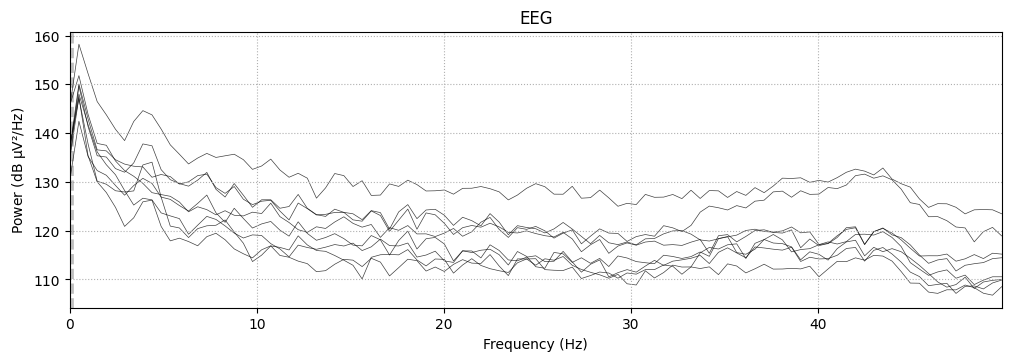

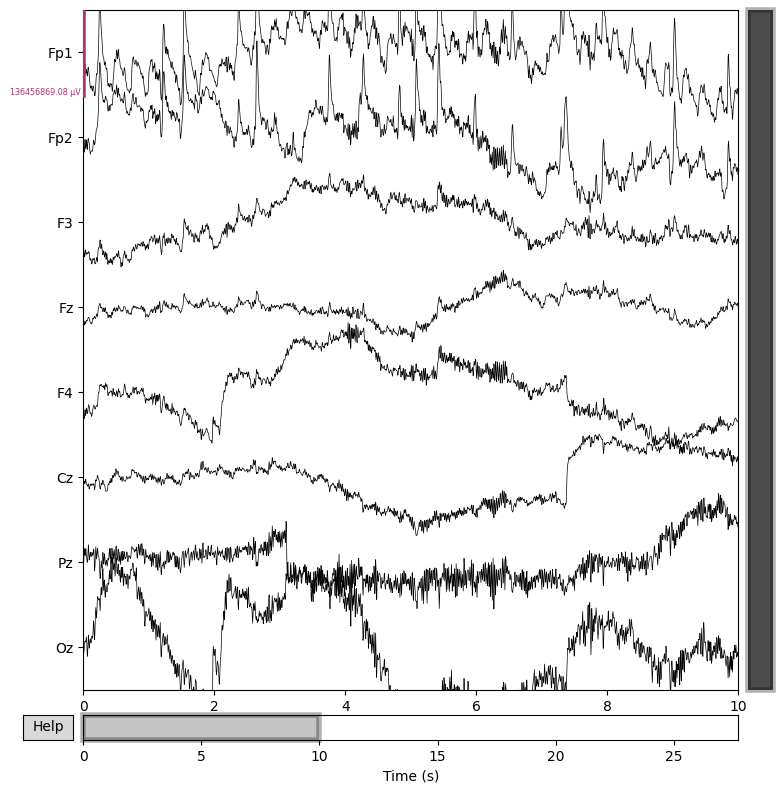

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
No digitization points found. Skipping sensor topomap plot.
Overwriting existing file.
Writing /content/Subject_1_oddball_paradigm_eeg.fif
Closing /content/Subject_1_oddball_paradigm_eeg.fif
[done]
EEG analysis complete. Processed data saved as 'processed_eeg.fif'.


<ipython-input-8-a3feff522c2e>:45: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot()


Creating RawArray with float64 data, n_channels=8, n_times=42734
    Range : 0 ... 42733 =      0.000 ...    42.733 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 33001 samples (33.001 s)



<ipython-input-8-a3feff522c2e>:24: RuntimeWarning: Omitted 42734 annotation(s) that were outside data range.
  raw.set_annotations(annotations)


Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 3.5s.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


No digitization points found. Skipping component plot.
Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 8 PCA components


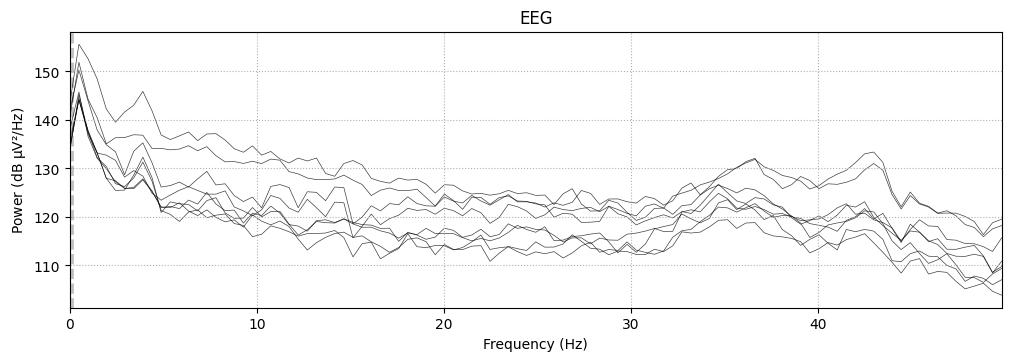

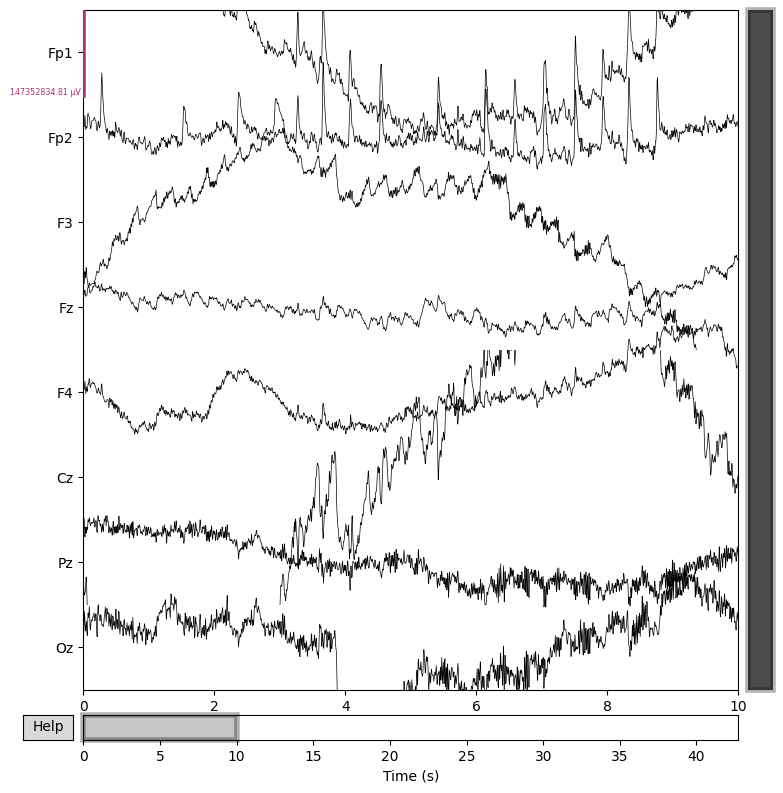

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
No digitization points found. Skipping sensor topomap plot.
Overwriting existing file.
Writing /content/Subject_1_stroop_task_eeg.fif
Closing /content/Subject_1_stroop_task_eeg.fif
[done]
EEG analysis complete. Processed data saved as 'processed_eeg.fif'.
Creating RawArray with float64 data, n_channels=8, n_times=42720
    Range : 0 ... 42719 =      0.000 ...    42.719 secs
Ready.


<ipython-input-8-a3feff522c2e>:45: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 33001 samples (33.001 s)



<ipython-input-8-a3feff522c2e>:24: RuntimeWarning: Omitted 42720 annotation(s) that were outside data range.
  raw.set_annotations(annotations)


Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 4.2s.


No digitization points found. Skipping component plot.
Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 8 PCA components


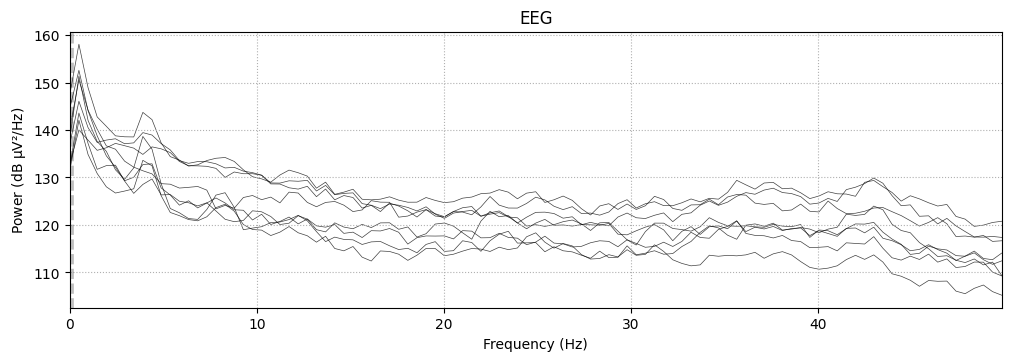

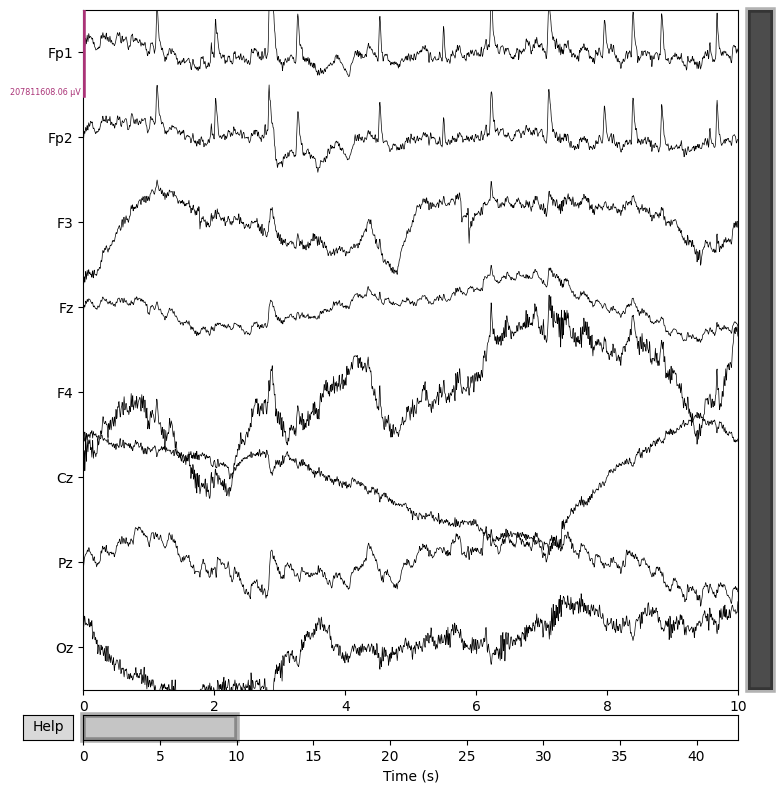

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
No digitization points found. Skipping sensor topomap plot.
Overwriting existing file.
Writing /content/Subject_1_task-switching_paradigm_eeg.fif
Closing /content/Subject_1_task-switching_paradigm_eeg.fif
[done]
EEG analysis complete. Processed data saved as 'processed_eeg.fif'.


<ipython-input-8-a3feff522c2e>:45: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot()


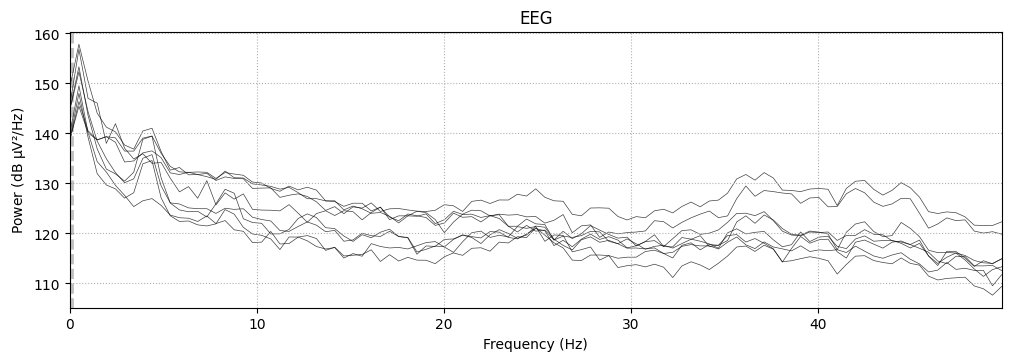

In [ ]:
ch_names=["Fp1","Fp2","F3","Fz","F4","Cz","Pz","Oz"]
import mne
import pandas as pd
import numpy as np

# Load EEG data
fileo=["/content/Subject_1_baseline_eyesclosed_eeg.csv","/content/Subject_1_baseline_eyesopen_eeg.csv","/content/Subject_1_dual-task_paradigm_eeg.csv","/content/Subject_1_oddball_paradigm_eeg.csv","/content/Subject_1_stroop_task_eeg.csv","/content/Subject_1_task-switching_paradigm_eeg.csv"]
for i in fileo:
    file_path = i
    data = pd.read_csv(file_path)

    # Metadata
    sfreq = 1000  # Sampling frequency in Hz
      # Exclude the 'timestamp' column
    ch_types = ['eeg'] * len(ch_names)  # Assuming all channels are EEG

    # Create MNE Raw object
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
    data_values = data.iloc[:, 1:].transpose()  # Transpose for MNE compatibility
    raw = mne.io.RawArray(data_values, info)

    # Add timestamps as annotations if needed
    annotations = mne.Annotations(onset=data['timestamp'] / sfreq, duration=0, description='EEG')
    raw.set_annotations(annotations)

    # Preprocess the Data
    # Bandpass filter (e.g., 0.1 to 40 Hz)
    raw.filter(l_freq=0.1, h_freq=50)

    # Detect and remove artifacts using ICA
    ica = mne.preprocessing.ICA(n_components=8, random_state=97, max_iter=800)  # Set n_components to the number of channels
    ica.fit(raw)
    try:
        ica.plot_components(show=False)  # Visualize components
    except RuntimeError:
        print("No digitization points found. Skipping component plot.")
    ica.exclude = [0]  # Example: Exclude the first component if it's an artifact
    ica.apply(raw)

    # Visualization
    # Raw signal plot
    raw.plot(n_channels=10, scalings='auto', title='Raw EEG', show=True)

    # Power Spectral Density (PSD)
    raw.compute_psd(fmax=50).plot()

    # Skip topographic sensor plot if no digitization points are available
    try:
        raw.plot_sensors(kind='topomap', show_names=True)
    except RuntimeError:
        print("No digitization points found. Skipping sensor topomap plot.")

    # Event detection (generate fixed-length events for example purposes)
    # events = mne.make_fixed_length_events(raw, duration=2.0)  # Create events every 2 seconds

    # # Extract epochs (event-related data)
    # epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=0.5, baseline=(None, 0))
    # epochs.plot()

    # Frequency analysis (Time-Frequency Representation)
    # power = mne.time_frequency.compute_tfr(method="multitaper")#,epochs,list(range(5,50)), n_cycles=2, time_bandwidth=2.0)
    # power.plot_topo(baseline=(-0.2, 0), mode='logratio', title='Time-Frequency Analysis')

    # Save the processed data
    raw.save(file_path[:-4]+'.fif', overwrite=True)

    print("EEG analysis complete. Processed data saved as 'processed_eeg.fif'.")



##Data Scaling
Downscaling to get a normallized Data Format
wrt to Mean and standard deviation observed in eyes-closed and eyes-open data

In [ ]:
import pandas as pd
lst=[]
for i in range(16,25):
    baseline_eyes_open = pd.read_csv('/content/Subject_'+str(i)+'_baseline_eyesopen_eeg.csv')
    baseline_eyes_closed = pd.read_csv('/content/Subject_'+str(i)+'_baseline_eyesclosed_eeg.csv')

    oddball_data = pd.read_csv('/content/Subject_'+str(i)+'_oddball_paradigm_eeg.csv')
    stroop_data = pd.read_csv('/content/Subject_'+str(i)+'_stroop_task_eeg.csv')
    task_switching_data = pd.read_csv('/content/Subject_'+str(i)+'_task-switching_paradigm_eeg.csv')
    dual_task_data = pd.read_csv('/content/Subject_'+str(i)+'_dual-task_paradigm_eeg.csv')

    eeg_columns = [col for col in baseline_eyes_open.columns if col != 'timestamp']
    baseline_mean = (baseline_eyes_open.mean() + baseline_eyes_closed.mean()) / 2
    baseline_mean=baseline_mean[eeg_columns]
    baseline_std = (baseline_eyes_open.std() + baseline_eyes_closed.std()) / 2
    baseline_std=baseline_std[eeg_columns]

    def normalize_eeg(data, baseline_mean, baseline_std):
        """
        Normalizes EEG data excluding the 'timestamp' column.

        Args:
            data: The DataFrame containing EEG data.
            baseline_mean: The baseline mean for normalization.
            baseline_std: The baseline standard deviation for normalization.

        Returns:
            A DataFrame with normalized EEG data.
        """
        # Select columns to normalize (exclude 'timestamp')
        eeg_columns = [col for col in data.columns if col != 'timestamp']

        # Normalize selected columns
        normalized_data = data.copy()  # Create a copy to avoid modifying the original DataFrame
        normalized_data[eeg_columns] = (normalized_data[eeg_columns] - baseline_mean) / baseline_std
        normalized_data["timestamp"] = data["timestamp"]  # Handle NaN values
        return normalized_data

    # Assuming oddball_data, stroop_data, etc., are defined and loaded

    oddball_normalized = normalize_eeg(oddball_data, baseline_mean, baseline_std)
    stroop_normalized = normalize_eeg(stroop_data, baseline_mean, baseline_std)
    task_switching_normalized = normalize_eeg(task_switching_data, baseline_mean, baseline_std)
    dual_task_normalized = normalize_eeg(dual_task_data, baseline_mean, baseline_std)


    oddball_normalized.to_csv('oddball_normalized '+str(i)+'.csv', index=False)
    stroop_normalized.to_csv('stroop_normalized'+str(i)+'.csv', index=False)
    task_switching_normalized.to_csv('task_switching_normalized'+str(i)+'.csv', index=False)
    dual_task_normalized.to_csv('dual_task_normalized'+str(i)+'.csv', index=False)
    lst.append('oddball_normalized '+str(i)+'.csv')
    lst.append('stroop_normalized'+str(i)+'.csv')
    lst.append('task_switching_normalized'+str(i)+'.csv')
    lst.append('dual_task_normalized'+str(i)+'.csv')


In [ ]:
lst

['oddball_normalized 16.csv',
 'stroop_normalized16.csv',
 'task_switching_normalized16.csv',
 'dual_task_normalized16.csv',
 'oddball_normalized 17.csv',
 'stroop_normalized17.csv',
 'task_switching_normalized17.csv',
 'dual_task_normalized17.csv',
 'oddball_normalized 18.csv',
 'stroop_normalized18.csv',
 'task_switching_normalized18.csv',
 'dual_task_normalized18.csv',
 'oddball_normalized 19.csv',
 'stroop_normalized19.csv',
 'task_switching_normalized19.csv',
 'dual_task_normalized19.csv',
 'oddball_normalized 20.csv',
 'stroop_normalized20.csv',
 'task_switching_normalized20.csv',
 'dual_task_normalized20.csv',
 'oddball_normalized 21.csv',
 'stroop_normalized21.csv',
 'task_switching_normalized21.csv',
 'dual_task_normalized21.csv',
 'oddball_normalized 22.csv',
 'stroop_normalized22.csv',
 'task_switching_normalized22.csv',
 'dual_task_normalized22.csv',
 'oddball_normalized 23.csv',
 'stroop_normalized23.csv',
 'task_switching_normalized23.csv',
 'dual_task_normalized23.csv',


In [ ]:

from google.colab import files
for file in lst:
  try:
    files.download(file)
  except FileNotFoundError:
    print(f"File not found: {file}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


import zipfile

def extract_zip(zip_filepath, extract_dir):
  """Extracts all files from a zip archive to a specified directory.

  Args:
    zip_filepath: The path to the zip file.
    extract_dir: The directory to extract the files to.
  """
  try:
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)
      print(f"Successfully extracted files from '{zip_filepath}' to '{extract_dir}'.")
  except FileNotFoundError:
    print(f"Error: Zip file not found at '{zip_filepath}'.")
  except zipfile.BadZipFile:
    print(f"Error: Invalid zip file '{zip_filepath}'.")


# Example usage
zip_file = "/content/Brainathon-2025_Dataset.zip"  # Replace with the actual path to your zip file
extraction_path = "/content/A"  # Replace with the desired extraction directory

extract_zip(zip_file, extraction_path)

Error: Invalid zip file '/content/Brainathon-2025_Dataset.zip'.


In [ ]:
import os
import pandas as pd
import numpy as np

def preprocess_data(file_path):
    """
    Preprocess EEG data from a given CSV file.
    - Handles missing values
    - Normalizes data
    - Returns a cleaned DataFrame and activity name
    """
    try:
        # Extract activity name from the file name
        activity = os.path.basename(file_path).replace('.csv', '')

        # Load EEG data into a DataFrame
        data = pd.read_csv(file_path)

        # Check if the file has valid EEG channels
        required_columns = {'Fp1', 'Fp2', 'F3', 'F4', 'Fz', 'Cz', 'Pz', 'Oz'}
        if not required_columns.issubset(set(data.columns)):
            print(f"Warning: {file_path} is missing required EEG channels. Skipping.")
            return None, None

        # Handle missing values: Fill with the mean of the respective column
        data.fillna(data.mean(), inplace=True)

        # Normalize EEG data (Min-Max scaling to range [0, 1])
        eeg_columns = list(required_columns)
        data[eeg_columns] = (data[eeg_columns] - data[eeg_columns].min()) / (data[eeg_columns].max() - data[eeg_columns].min())

        return data, activity

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None

def process_all_subjects(data_dir):
    """
    Process EEG data for all subjects in the given directory.
    Determines the activity being performed based on CSV filenames.
    """
    all_data = []  # List to hold processed data
    activity_labels = []  # Corresponding activity labels

    # Loop through all subject folders
    for subject_folder in os.listdir(data_dir):
        subject_path = os.path.join(data_dir, subject_folder)
        if os.path.isdir(subject_path):
            print(f"Processing {subject_folder}...")

            # Loop through all files in each subject's folder
            for file_name in os.listdir(subject_path):
                if file_name.endswith('.csv') and 'eeg' in file_name.lower():
                    file_path = os.path.join(subject_path, file_name)

                    # Preprocess the EEG data
                    data, activity = preprocess_data(file_path)
                    if data is not None and activity is not None:
                        all_data.append(data)
                        activity_labels.append(activity)

    print("Processing complete.")
    return all_data, activity_labels

if __name__ == "__main__":
    # Root directory containing subject folders
    DATA_DIR = "path_to_your_data_directory"  # Replace with your dataset path

    # Process all subjects and get the data with activities
    eeg_data, activities = process_all_subjects(DATA_DIR)

    # Print summary
    for idx, activity in enumerate(activities):
        print(f"Subject {idx + 1}: Activity = {activity}, Data Shape = {eeg_data[idx].shape}")


#Data Visualization

Understanding Common Patterns in the eeg data
Through Filtering data with respect to frequency

Points Calculated :
Skewness ,
Mean ,
Variance,
PowerBand,
Distribution,
Mobility ,
Complexity,
Hjroth Coeffiencient

In [ ]:
!pip install eeglib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 86.9 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512551 sha256=e7e811fc446694b6779f46be53844133c9079af824dde756149538fdb72ab235
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 99.6 MB/s eta 0:00:00


In [ ]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
lst=["/content/stroop_normalized1.csv","/content/task_switching_normalized1.csv","/content/oddball_normalized 1.csv","/content/dual_task_normalized1.csv"]
    # Load EEG Data
for i in lst:
    csv_file = str(i) # Replace with your CSV file path
    eeg_data = pd.read_csv(csv_file)

    # Define parameters
    sampling_rate = 256  # Adjust based on your dataset
    columns = list(eeg_data.columns)  # Assuming each column is an EEG channel

    # Convert EEG data to MNE RawArray
    info = mne.create_info(ch_names=columns, sfreq=sampling_rate, ch_types="eeg")
    raw = mne.io.RawArray(eeg_data.values.T, info)

    # Preprocessing
    print("Applying preprocessing steps...")
    raw.filter(1, 60)  # Bandpass filter (1-60 Hz)
    raw.notch_filter(freqs=60)  # Notch filter to remove powerline noise

    # Function to compute bandpower
    def calculate_bandpower(data, sf, band, window_sec=4):
        """Compute bandpower in a specified frequency band."""
        from mne.time_frequency import psd_array_multitaper

        band = np.array(band)
        psd, freqs = psd_array_multitaper(data, sfreq=sf, fmin=band[0], fmax=band[1], adaptive=True, normalization="full",verbose=0)
        bandpower = np.sum(psd, axis=-1)
        return bandpower

    # Define frequency bands
    frequency_bands = {
        "Delta": [0.5, 4],
        "Theta": [4, 8],
        "Alpha": [8, 13],
        "Beta": [13, 30],
        "Gamma": [30, 50],
    }

    # Extract features for all channels
    #print("Extracting features...")
    all_features = []
    for idx, ch_name in enumerate(columns):
        #print(f"Processing {ch_name}...")
        channel_data = raw.get_data(picks=ch_name).flatten()
        channel_features = {}

        # Bandpower features
        for band_name, band_range in frequency_bands.items():
            channel_features[f"Bandpower_{band_name}"] = calculate_bandpower(channel_data, sampling_rate, band_range)

        # Hjorth parameters (using numpy)
        def calculate_hjorth(data):
            first_derivative = np.diff(data)
            second_derivative = np.diff(first_derivative)

            var_data = np.var(data)
            var_diff = np.var(first_derivative)
            var_sec_diff = np.var(second_derivative)

            activity = var_data
            mobility = np.sqrt(var_diff / var_data)
            complexity = np.sqrt(var_sec_diff / var_diff) / mobility
            return {"Activity": activity, "Mobility": mobility, "Complexity": complexity}

        hjorth_params = calculate_hjorth(channel_data)
        for key, value in hjorth_params.items():
            channel_features[f"Hjorth_{key}"] = value

        # Statistical features
        channel_features["Mean"] = np.mean(channel_data)
        channel_features["Variance"] = np.var(channel_data)
        channel_features["Skewness"] = pd.Series(channel_data).skew()
        channel_features["Kurtosis"] = pd.Series(channel_data).kurtosis()

        # Zero Crossing Rate
        channel_features["Zero_Crossings"] = ((channel_data[:-1] * channel_data[1:]) < 0).sum()

        # Combine features for the channel
        all_features.append(channel_features)

    # Combine all features into a DataFrame
    features_df = pd.DataFrame(all_features, index=columns)
    print(features_df)
    #print(f"\nAll features saved to '{output_file}'.")


Creating RawArray with float64 data, n_channels=9, n_times=42734
    Range : 0 ... 42733 =      0.000 ...   166.926 secs
Ready.
Applying preprocessing steps...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 845 samples (3.301 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband r

Creating RawArray with float64 data, n_channels=9, n_times=42734
    Range : 0 ... 42733 =      0.000 ...   166.926 secs
Ready.
Applying preprocessing steps...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 845 samples (3.301 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband r

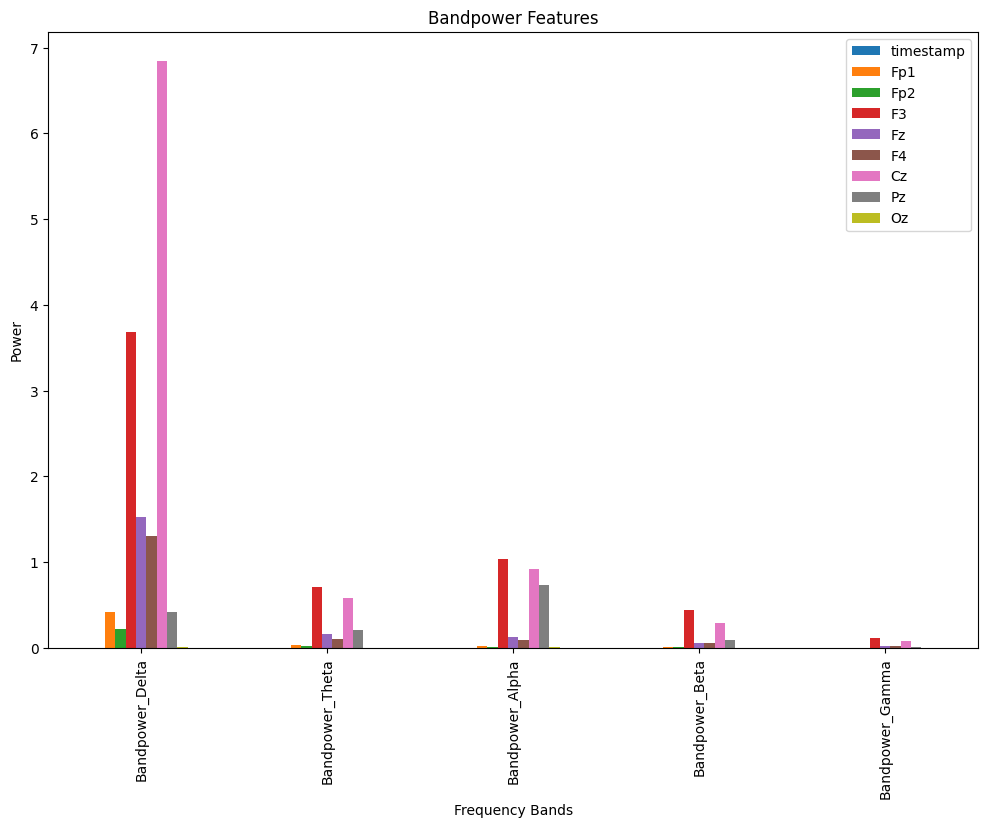

Creating RawArray with float64 data, n_channels=9, n_times=42720
    Range : 0 ... 42719 =      0.000 ...   166.871 secs
Ready.
Applying preprocessing steps...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 845 samples (3.301 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband r

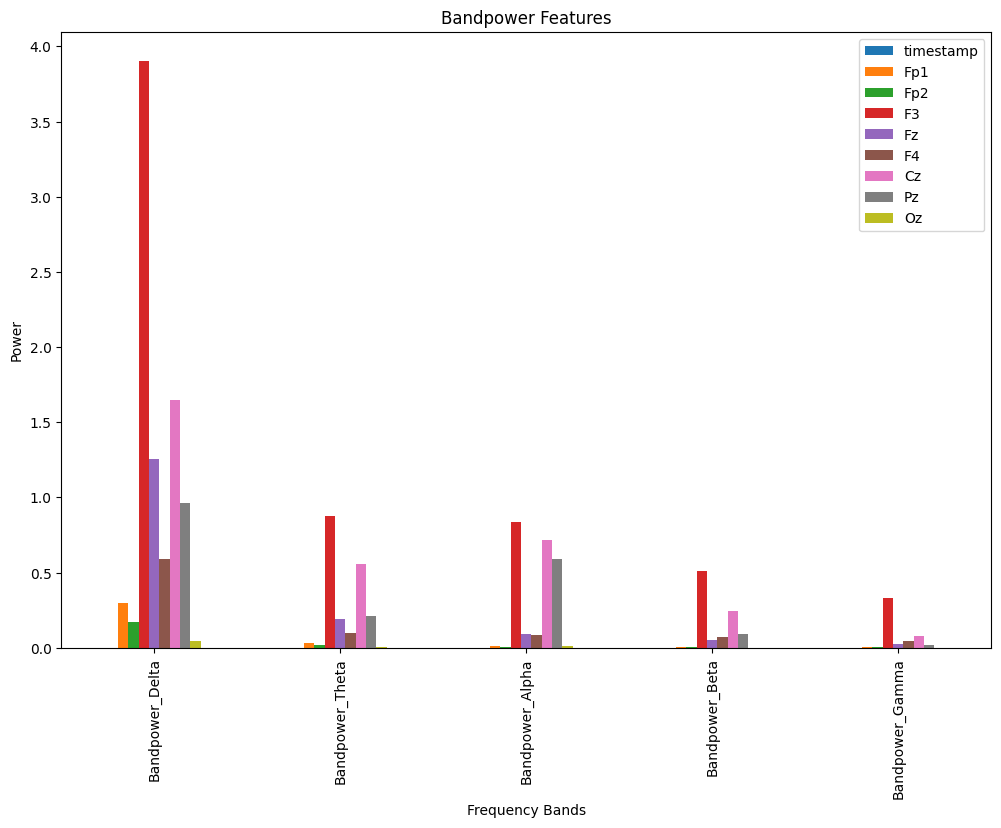

Creating RawArray with float64 data, n_channels=9, n_times=27730
    Range : 0 ... 27729 =      0.000 ...   108.316 secs
Ready.
Applying preprocessing steps...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 845 samples (3.301 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband r

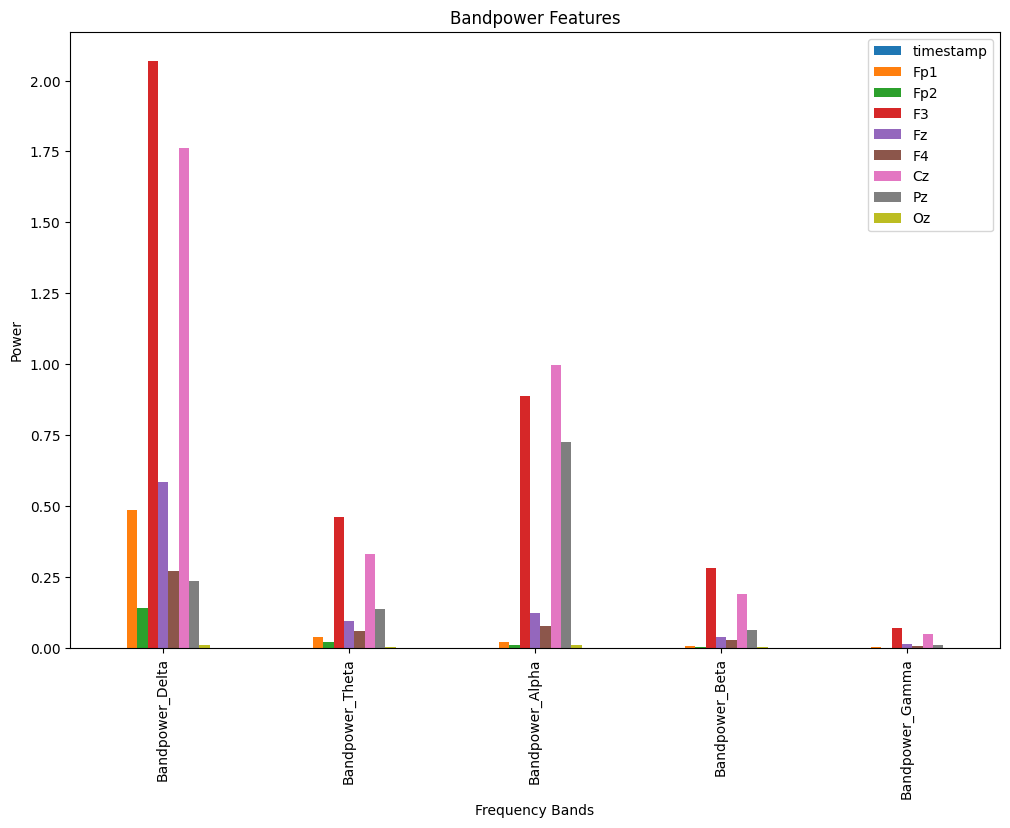

Creating RawArray with float64 data, n_channels=9, n_times=27727
    Range : 0 ... 27726 =      0.000 ...   108.305 secs
Ready.
Applying preprocessing steps...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 845 samples (3.301 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband r

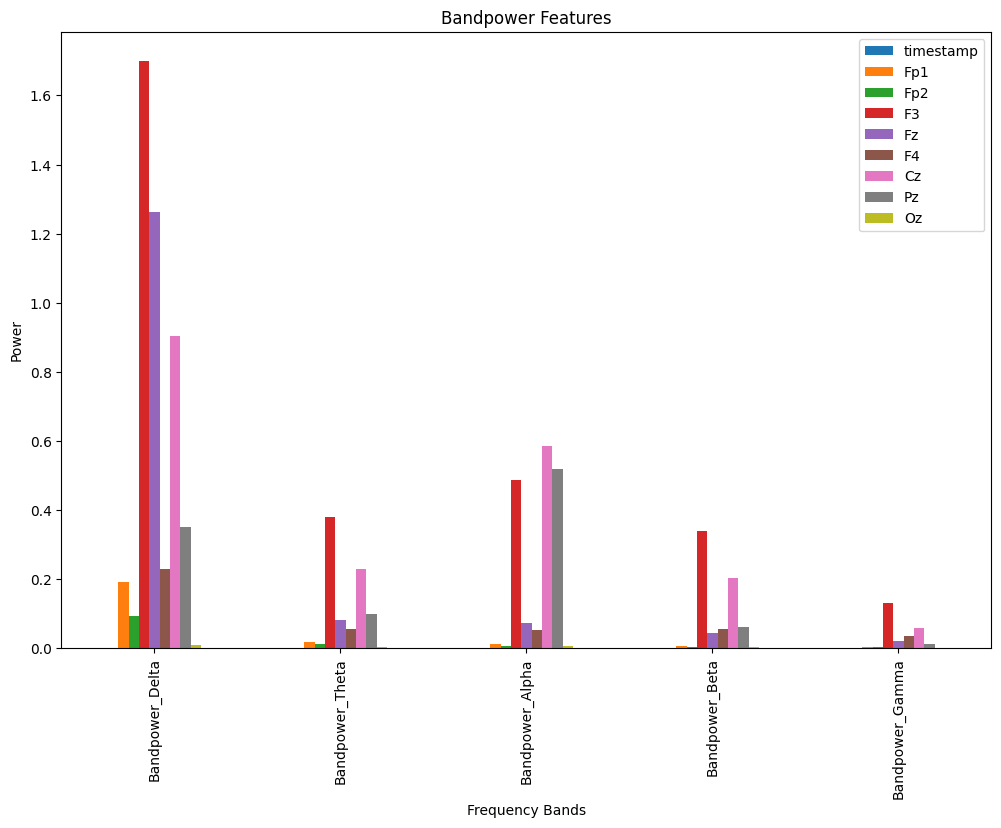

In [ ]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
lst=["/content/stroop_normalized1.csv","/content/task_switching_normalized1.csv","/content/oddball_normalized 1.csv","/content/dual_task_normalized1.csv"]
    # Load EEG Data
for i in lst:
    csv_file = str(i) # Replace with your CSV file path
    eeg_data = pd.read_csv(csv_file)

    # Define parameters
    sampling_rate = 256  # Adjust based on your dataset
    columns = list(eeg_data.columns)  # Assuming each column is an EEG channel

    # Convert EEG data to MNE RawArray
    info = mne.create_info(ch_names=columns, sfreq=sampling_rate, ch_types="eeg")
    raw = mne.io.RawArray(eeg_data.values.T, info)

    # Preprocessing
    print("Applying preprocessing steps...")
    raw.filter(1, 60)  # Bandpass filter (1-60 Hz)
    raw.notch_filter(freqs=60)  # Notch filter to remove powerline noise

    # Function to compute bandpower
    def calculate_bandpower(data, sf, band, window_sec=4):
        """Compute bandpower in a specified frequency band."""
        from mne.time_frequency import psd_array_multitaper

        band = np.array(band)
        psd, freqs = psd_array_multitaper(data, sfreq=sf, fmin=band[0], fmax=band[1], adaptive=True, normalization="full",verbose=0)
        bandpower = np.sum(psd, axis=-1)
        return bandpower

    # Define frequency bands
    frequency_bands = {
        "Delta": [0.5, 4],
        "Theta": [4, 8],
        "Alpha": [8, 13],
        "Beta": [13, 30],
        "Gamma": [30, 50],
    }

    # Extract features for all channels
    #print("Extracting features...")
    all_features = []
    for idx, ch_name in enumerate(columns):
        #print(f"Processing {ch_name}...")
        channel_data = raw.get_data(picks=ch_name).flatten()
        channel_features = {}

        # Bandpower features
        for band_name, band_range in frequency_bands.items():
            channel_features[f"Bandpower_{band_name}"] = calculate_bandpower(channel_data, sampling_rate, band_range)

        # Hjorth parameters (using numpy)
        def calculate_hjorth(data):
            first_derivative = np.diff(data)
            second_derivative = np.diff(first_derivative)

            var_data = np.var(data)
            var_diff = np.var(first_derivative)
            var_sec_diff = np.var(second_derivative)

            activity = var_data
            mobility = np.sqrt(var_diff / var_data)
            complexity = np.sqrt(var_sec_diff / var_diff) / mobility
            return {"Activity": activity, "Mobility": mobility, "Complexity": complexity}

        hjorth_params = calculate_hjorth(channel_data)
        for key, value in hjorth_params.items():
            channel_features[f"Hjorth_{key}"] = value

        # Statistical features
        channel_features["Mean"] = np.mean(channel_data)
        channel_features["Variance"] = np.var(channel_data)
        channel_features["Skewness"] = pd.Series(channel_data).skew()
        channel_features["Kurtosis"] = pd.Series(channel_data).kurtosis()

        # Zero Crossing Rate
        channel_features["Zero_Crossings"] = ((channel_data[:-1] * channel_data[1:]) < 0).sum()

        # Combine features for the channel
        all_features.append(channel_features)

    # Combine all features into a DataFrame
    features_df = pd.DataFrame(all_features, index=columns)

    #print(f"\nAll features saved to '{output_file}'.")

    # Optional: Visualize Bandpower Features
    #print("\nVisualizing Bandpower Features...")
    bandpower_data = features_df.filter(like="Bandpower_")
    bandpower_data.T.plot(kind='bar', figsize=(12, 8), legend=True, title="Bandpower Features")
    plt.ylabel("Power")
    plt.xlabel("Frequency Bands")
    plt.show()


# Models for Multi-Class Classification

Trying and all the implemented models in Research papers which proved to be useful

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.layers import Input
from keras.layers import Input, Conv2D, BatchNormalization, Dropout, AveragePooling2D, Flatten, Dense, Add, SeparableConv2D
from keras.models import Model

# Check GPU availability in Google Colab

# Function to preprocess EEG data
def preprocess_data(data_folder, sampling_rate=250, time_window=2):
    """
    Load and preprocess EEG data from CSV files.
    Each file is named after an activity and contains EEG signals.
    Returns:
        X (numpy array): EEG signal data
        y (numpy array): Corresponding activity labels
    """
    X, y = [], []
    samples_per_window = sampling_rate * time_window  # Total samples for the given time window

    # Loop through all CSV files in the data folder
    for file in os.listdir(data_folder):
        if file.endswith(".csv") and file[0] != "S":
            activity_label = file.split('.')[0][0]  # Extract activity name from filename
            #print(activity_label)
            file_path = os.path.join(data_folder, file)

            # Load EEG data from CSV file
            eeg_data = pd.read_csv(file_path)

            # Assume EEG data is organized as (time_steps, channels)
            num_samples, num_channels = eeg_data.shape
            num_windows = num_samples // samples_per_window

            # Extract windows of data
            for i in range(num_windows):
                start_idx = i * samples_per_window
                end_idx = start_idx + samples_per_window
                window = eeg_data.iloc[start_idx:end_idx].values
                X.append(window)
                y.append(activity_label)

    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y

# ---------------------------- Main Code ----------------------------

data_folder = r"/content"  # Replace with the path to your EEG dataset folder
sampling_rate = 250
time_window = 2

# Load and preprocess the data
X, y = preprocess_data(data_folder, sampling_rate, time_window)
print(f"Loaded {len(X)} samples with shape {X.shape} and labels: {set(y)}")

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Add a channel dimension for Conv2D
X_train = X_train[..., np.newaxis]  # Shape: (samples, time_steps, channels, 1)
X_test = X_test[..., np.newaxis]

# Input dimensions
input_shape = X_train.shape[1:]
num_classes = len(label_encoder.classes_)

# Function to build the EEG model (SCCNet, EEG_TCNet, or FBCNet)
def build_updated_eeg_tcnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # First Conv2D block
    x = Conv2D(32, (3, 3), activation='elu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Depthwise Separable Convolution
    x = layers.SeparableConv2D(64, (3, 3), activation='elu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Average Pooling
    x = AveragePooling2D(pool_size=(2, 2))(x)

    # Second Conv2D block
    x = Conv2D(128, (3, 3), activation='elu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Flatten and Dense layers
    x = Flatten()(x)
    x = Dense(128, activation='elu')(x)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Updated SCCNet
def build_updated_sccnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # First Conv2D block (spatial features)
    x1 = Conv2D(64, (1, input_shape[1]), activation='elu')(inputs)
    x1 = BatchNormalization()(x1)

    # Second Conv2D block (temporal features)
    x2 = Conv2D(64, (input_shape[0], 1), activation='elu')(inputs)
    x2 = BatchNormalization()(x2)

    # Combine spatial and temporal features
    x = Add()([x1, x2])
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(128, activation='elu')(x)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Function to build FBCNet
def build_fbcnet(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (1, input_shape[2]), activation='elu', input_shape=input_shape),
        layers.DepthwiseConv2D((input_shape[1], 1), activation='elu'),
        layers.BatchNormalization(),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (1, 1), activation='elu'),
        layers.Flatten(),
        layers.Dense(128, activation='elu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Compile and train models on GPU in Google Colab
models_dict = {
    "SCCNet": build_updated_sccnet(input_shape, num_classes),
    "EEG_TCNet": build_updated_eeg_tcnet(input_shape, num_classes),
    "FBCNet": build_fbcnet(input_shape, num_classes)
}

# Train and evaluate all models
for model_name, model in models_dict.items():
    print(f"Training {model_name}...")

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model on GPU
    with tf.device('/GPU:0'):  # Ensure GPU is used

            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12, batch_size=32)
            test_loss, test_accuracy = model.evaluate(X_test, y_test)
            print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12, batch_size=32)
            test_loss, test_accuracy = model.evaluate(X_test, y_test)
            print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12, batch_size=32)
            test_loss, test_accuracy = model.evaluate(X_test, y_test)
            print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")

            print("GPU not available")

# Save trained models
for model_name, model in models_dict.items():
    model.save(f"{model_name}_eeg_model.h5")
    print(f"{model_name} model saved as {model_name}_eeg_model.h5")

print("Training and evaluation complete.")


Loaded 6550 samples with shape (6550, 500, 9) and labels: {'s', 't', 'o', 'd'}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training SCCNet...
Epoch 1/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.3520 - loss: 54.9534 - val_accuracy: 0.3573 - val_loss: 1.6790
Epoch 2/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3252 - loss: 1.8212 - val_accuracy: 0.3168 - val_loss: 1.3257
Epoch 3/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3112 - loss: 1.8286 - val_accuracy: 0.3588 - val_loss: 1.2536
Epoch 4/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3241 - loss: 1.5841 - val_accuracy: 0.3687 - val_loss: 1.2245
Epoch 5/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3137 - loss: 1.6973 - val_accuracy: 0.3176 - val_loss: 1.3082
Epoch 6/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3063 - loss: 1.6011 - val_accuracy: 0.3344 - val_loss: 1.2589
Epoch 7/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3247 - loss: 1.5772 - val_accuracy: 0.3786 - val_loss: 1.2193
Epoch 8/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3059 - lo

FBCNet Test Accuracy: 0.9305
GPU not available


SCCNet model saved as SCCNet_eeg_model.h5


EEG_TCNet model saved as EEG_TCNet_eeg_model.h5
FBCNet model saved as FBCNet_eeg_model.h5
Training and evaluation complete.


In [ ]:
!pip install spektral

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 9.7 MB/s eta 0:00:00


In [ ]:
from keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D, LSTM, GRU, Reshape, MultiHeadAttention, Add, Permute
from keras.models import Model
from keras import layers
import tensorflow as tf
from keras import layers, models
import spektral
from keras.layers import (Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense,
                          AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D, LSTM, GRU, Reshape,
                          MultiHeadAttention, Add, Permute, Concatenate)
from keras.models import Model, Sequential
import tensorflow as tf
lsto=[]
#from spektral.layers import GraphConv

def build_fully_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

def build_residual_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    shortcut = x
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

def build_rnn_lstm(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Permute((2, 1, 3))(inputs)
    x = Reshape((input_shape[1], -1))(x)
    x = LSTM(64, return_sequences=False)(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

def build_rnn_gru(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Permute((2, 1, 3))(inputs)
    x = Reshape((input_shape[1], -1))(x)
    x = GRU(64, return_sequences=False)(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

def build_attention_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

def build_hybrid_cnn_lstm(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Reshape((x.shape[1], x.shape[2] * x.shape[3]))(x)
    x = LSTM(64, return_sequences=False)(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

def build_transformer(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Permute((2, 1, 3))(inputs)
    x = Reshape((input_shape[1], -1))(x)
    x = layers.TransformerBlock(num_heads=4, key_dim=64)(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

def build_graph_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

def build_inception(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    branch1 = Conv2D(32, (1, 1), activation='relu', padding='same')(inputs)
    branch2 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    branch3 = Conv2D(32, (5, 5), activation='relu', padding='same')(inputs)
    x = layers.Concatenate()([branch1, branch2, branch3])
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

def build_eegnex(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

def build_neuro_gpt(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape[:-1]),
        layers.LSTM(128, return_sequences=True),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

def build_eeg_transformer(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.MultiHeadAttention(num_heads=8, key_dim=input_shape[-1])(inputs, inputs)
    x = layers.LayerNormalization()(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

def build_eeg_gpt(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=5, activation='relu', input_shape=input_shape[:-1]),
        layers.TransformerEncoder(num_layers=2, d_model=128, num_heads=4),
        layers.GlobalAveragePooling1D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

def build_intertwined_nn(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

def build_gnn4eeg(input_shape, num_classes):
    inputs = layers.Input(shape=(input_shape[0], input_shape[1]))
    adjacency = layers.Input(shape=(input_shape[0], input_shape[0]))
    x = GraphConv(64, activation='relu')([inputs, adjacency])
    x = GraphConv(64, activation='relu')([x, adjacency])
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model([inputs, adjacency], outputs)




# Fully-CNN Model
def build_fully_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)


# Residual-CNN Model
def build_residual_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    shortcut = x
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)


# Modified RNN-LSTM Model
def build_rnn_lstm_modified(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Permute((2, 1, 3))(inputs)
    x = Reshape((input_shape[1], -1))(x)
    x = LSTM(128, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = LSTM(64, return_sequences=False)(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)


# Modified Inception Model
def build_inception_modified(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    branch1 = Conv2D(64, (1, 1), activation='relu', padding='same')(inputs)
    branch2 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    branch3 = Conv2D(64, (5, 5), activation='relu', padding='same')(inputs)
    branch4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(inputs)
    x = Concatenate()([branch1, branch2, branch3, branch4])
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)


# Modified EEGNex Model
def build_eegnex_modified(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_fbcnet(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (1, input_shape[2]), activation='elu', input_shape=input_shape),
        layers.DepthwiseConv2D((input_shape[1], 1), activation='elu'),
        layers.BatchNormalization(),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (1, 1), activation='elu'),
        layers.Flatten(),
        layers.Dense(128, activation='elu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Di
# Add the models to a dictionary
models_dict = {
    "Fully-CNN": build_fully_cnn(input_shape, num_classes),
    "Residual-CNN": build_residual_cnn(input_shape, num_classes),
    "RNN-LSTM": build_rnn_lstm(input_shape, num_classes),
    #"RNN-GRU": build_rnn_gru(input_shape, num_classes),
    #"Attention-CNN": build_attention_cnn(input_shape, num_classes),
    "Hybrid-CNN-LSTM": build_hybrid_cnn_lstm(input_shape, num_classes),
    #"Transformer": build_transformer(input_shape, num_classes),
    "Graph-CNN": build_graph_cnn(input_shape, num_classes),
    "Inception": build_inception(input_shape, num_classes),
    #"eeggpt": build_eeg_gpt(input_shape, num_classes),
    "eegnex": build_eegnex(input_shape, num_classes),
    #"neuro-gpt": build_neuro_gpt(input_shape, num_classes),
   # "Interwined_nn": build_intertwined_nn(input_shape, num_classes),
   # "GNN_EEG": build_gnn4eeg(input_shape, num_classes),
    #"RNN-LSTM (Modified)": build_rnn_lstm_modified(input_shape, num_classes),
    #"Inception (Modified)": build_inception_modified(input_shape, num_classes),
    #"EEGNex (Modified)": build_eegnex_modified(input_shape, num_classes),
    "FBCNet": build_fbcnet(input_shape, num_classes),
}

# Compile, train, and evaluate
for model_name, model in models_dict.items():
    print(f"Training {model_name}...")

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model on GPU
    with tf.device('/GPU:0'):  # Ensure GPU is used
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=32)
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
        lsto.append(model)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=32)
        test_loss, test_accuracy2 = model.evaluate(X_test, y_test)
        print(f"{model_name} Test Accuracy: {test_accuracy2:.4f}")
        if (test_accuracy2>test_accuracy):
            lsto.pop()
            lsto.append(model)
            test_accuracy=test_accuracy2

        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=32)
        test_loss, test_accuracy3 = model.evaluate(X_test, y_test)
        print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
        if (test_accuracy3>test_accuracy):
            lsto.pop()
            lsto.append(model)
        #lsto.append(model)


Training Fully-CNN...
Epoch 1/8
164/164 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.4994 - loss: 1.0532 - val_accuracy: 0.3107 - val_loss: 1.5120
Epoch 2/8
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6478 - loss: 0.7706 - val_accuracy: 0.5069 - val_loss: 1.0032
Epoch 3/8
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6876 - loss: 0.7011 - val_accuracy: 0.7351 - val_loss: 0.6515
Epoch 4/8
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7174 - loss: 0.6350 - val_accuracy: 0.5885 - val_loss: 0.8035
Epoch 5/8
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7364 - loss: 0.5930 - val_accuracy: 0.6260 - val_loss: 0.7802
Epoch 6/8
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7467 - loss: 0.5665 - val_accuracy: 0.7550 - val_loss: 0.5751
Epoch 7/8
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7914 - loss: 0.5047 - val_accuracy: 0.7832 - val_loss: 0.5137
Epoch 8/8
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7837 - loss: 0.

In [ ]:
!pip install braindecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.2/165.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 20.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from braindecode import EEGClassifier
from braindecode.models import Deep4Net
from braindecode.preprocessing import Preprocessor, preprocess
from braindecode.datautil import create_from_X_y
from braindecode.datautil.windowers import create_windows_from_events
from skorch.helper import predefined_split

# Define the Model
n_classes = len(np.unique(y))  # Number of classes
in_chans = X.shape[1]  # Number of EEG channels
from braindecode.models import Deep4Net

model = Deep4Net(
    in_chans=n_channels,  # Number of EEG channels
    n_classes=n_classes,  # Number of output classes
    input_window_samples=n_samples,  # Adjust based on your dataset
    final_conv_length='auto',  # Automatic calculation of the final convolutional layer
)

model = Deep4Net(
    in_chans=in_chans,
    n_classes=n_classes,
    input_time_length=None,  # Can be adjusted
    final_conv_length="auto",
)
model = torch.nn.Sequential(model)

# Define EEG Classifier
clf = EEGClassifier(
    model,
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.Adam,
    train_split=predefined_split(None),  # Use entire dataset for training
    optimizer__lr=0.001,
    batch_size=32,
    device="cuda" if torch.cuda.is_available() else "cpu",
)

# Train the Model
clf.fit(X_train, y_train, epochs=20)

# Evaluate the Model
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save Model
torch.save(model.state_dict(), "braindecode_multiclass_model.pth")
print("Model saved as 'braindecode_multiclass_model.pth'")


/usr/local/lib/python3.10/dist-packages/braindecode/datautil/__init__.py:15: UserWarning: create_from_X_y has been moved to datasets, please use from braindecode.datasets import create_from_X_y
  warn('create_from_X_y has been moved to datasets, please use from braindecode.datasets import create_from_X_y')
/usr/local/lib/python3.10/dist-packages/braindecode/datautil/windowers.py:4: UserWarning: datautil.windowers module is deprecated and is now under preprocessing.windowers, please use from import braindecode.preprocessing.windowers
  warn('datautil.windowers module is deprecated and is now under '


TypeError: Deep4Net.__init__() got an unexpected keyword argument 'input_time_length'

In [ ]:
!pip show braindecode


Name: braindecode
Version: 0.8.1
Summary: Deep learning software to decode EEG, ECG or MEG signals
Home-page: https://braindecode.org
Author: 
Author-email: Robin Tibor Schirrmeister <robintibor@gmail.com>
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: docstring-inheritance, einops, h5py, joblib, matplotlib, mne, numpy, pandas, scipy, skorch, torch, torchinfo
Required-by: 


In [ ]:
print(model.predict(X_test))
print(y_test)

2/2 [==============================] - 0s 212ms/step
[[7.61341398e-21 6.24010887e-22 1.10855054e-31 4.90938020e-16
  9.99999940e-01 2.97168757e-12]
 [7.24955482e-18 1.46092967e-17 5.31574197e-24 1.20752963e-13
  9.99999940e-01 2.39641871e-08]
 [0.00000000e+00 6.16680969e-22 0.00000000e+00 3.22160989e-01
  6.77838981e-01 0.00000000e+00]
 [0.00000000e+00 4.90964864e-22 0.00000000e+00 1.66709319e-01
  8.33290696e-01 0.00000000e+00]
 [1.73572321e-17 1.08601019e-16 1.01581748e-21 1.48381917e-13
  9.99999225e-01 6.76411958e-07]
 [0.00000000e+00 3.44349094e-22 0.00000000e+00 8.50634128e-02
  9.14936602e-01 0.00000000e+00]
 [0.00000000e+00 9.43736231e-24 0.00000000e+00 4.66461497e-04
  9.99533474e-01 0.00000000e+00]
 [2.32557447e-38 1.80544169e-37 0.00000000e+00 4.78734800e-27
  9.99999940e-01 5.34680160e-37]
 [3.43823754e-29 6.57597420e-30 0.00000000e+00 2.14903432e-22
  9.99999940e-01 4.32681624e-23]
 [1.65756787e-17 2.06120213e-16 3.15892754e-19 1.67999058e-14
  9.99992788e-01 7.17927423e-0

In [ ]:
print(num_classes)
print(y_test)
print(X_train)

6
[2 3 3 4 4 5 4 5 5 2 3 5 4 5 2 4 2 5 2 5 4 1 2 3 3]
[[[[ 8.02180489e+05]
   [-7.50565200e+04]
   [-6.25244960e+04]
   ...
   [-4.38750430e+04]
   [-4.47060550e+04]
   [ 1.92342130e+03]]

  [[ 8.02180493e+05]
   [-7.50599800e+04]
   [-6.25266520e+04]
   ...
   [-4.38745550e+04]
   [-4.47065860e+04]
   [ 1.92134610e+03]]

  [[ 8.02180497e+05]
   [-7.50679140e+04]
   [-6.25316170e+04]
   ...
   [-4.38736600e+04]
   [-4.47078480e+04]
   [ 1.92065430e+03]]

  ...

  [[ 8.02185477e+05]
   [-7.51643900e+04]
   [-6.24785160e+04]
   ...
   [-4.34636640e+04]
   [-4.44996760e+04]
   [ 2.28222660e+03]]

  [[ 8.02185481e+05]
   [-7.51645160e+04]
   [-6.24762800e+04]
   ...
   [-4.34626500e+04]
   [-4.44978440e+04]
   [ 2.28552250e+03]]

  [[ 8.02185485e+05]
   [-7.51638200e+04]
   [-6.24768480e+04]
   ...
   [-4.34608160e+04]
   [-4.45004900e+04]
   [ 2.28560400e+03]]]


 [[[ 8.02502801e+05]
   [-7.92096800e+04]
   [-6.29227300e+04]
   ...
   [-3.10764980e+04]
   [-9.51330600e+03]
   [ 1.00046390

In [ ]:
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score

def integrate_models(models, X_test, y_test):
    """
    Integrates multiple models by computing the mode of their predictions.

    Args:
    - models: list of trained models.
    - X_test: numpy array, test data.
    - y_test: numpy array, true labels for the test data.

    Returns:
    - final_predictions: numpy array, the final predictions after integration.
    - ensemble_accuracy: float, accuracy of the ensemble on the test data.
    """
    # Collect predictions from all models
    # Get the predicted class labels by taking the argmax along axis 1 (for each sample)
    predictions = np.array([model.predict(X_test).argmax(axis=1) for model in models])

    # Compute the mode of predictions (most common prediction)
    final_predictions = mode(predictions, axis=0)[0]

    # Calculate ensemble accuracy
    ensemble_accuracy = accuracy_score(y_test, final_predictions)

    return final_predictions, ensemble_accuracy

# Example usage
if __name__ == "__main__":
    # Load or define your models (trained models)
    # Example: models = [residual_cnn_model, fully_cnn_model, hybrid_cnn_lstm_model, graph_cnn_model, inception_model, fbcnet_model]

    for i in range(len(lsto)):
        # Get the predicted class labels using argmax
        pred = lsto[i].predict(X_test).argmax(axis=1)

        print(accuracy_score(y_test, pred)) # Modified to print accuracy correctly
    lsto.pop(6)
    lsto.pop(5)
    lsto.pop(2)
    # Assuming X_test and y_test are your test dataset and labels
    # Replace these with your actual test data and labels
          # Example test labels
    # Call the integration function
    final_predictions, ensemble_accuracy = integrate_models(lsto, X_test, y_test)

    # Print results
    print("Final Ensemble Accuracy:", ensemble_accuracy)
    print("Ensemble Predictions:", final_predictions)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
0.8732824427480916
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
0.9465648854961832
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.4076335877862595
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
0.8664122137404581
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
0.9
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.49694656488549616
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.3015267175572519
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.9198473282442748
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Final Ensemble Accuracy: 0.9511450381679389
Ensemble Predictions: [2 3 3 ... 1 0 3]


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       259
           1       1.00      1.00      1.00       283
           2       0.99      0.96      0.98       395
           3       0.93      0.90      0.91       373

    accuracy                           0.95      1310
   macro avg       0.95      0.96      0.95      1310
weighted avg       0.95      0.95      0.95      1310

Confusion Matrix:
 [[251   0   0   8]
 [  0 283   0   0]
 [  0   0 378  17]
 [ 37   0   2 334]]


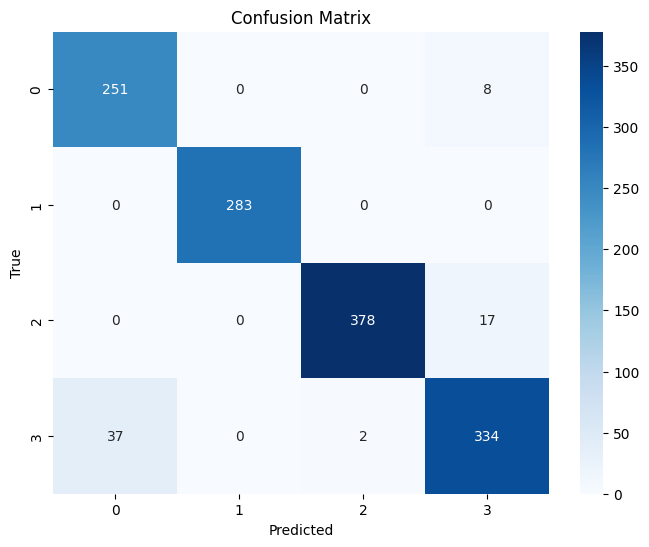

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report




y_pred = final_predictions # Make sure y_pred is the predicted labels, not probabilities.  Use argmax if needed.



print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()